In [118]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [119]:
df = pd.read_csv("pima_indians_diabetes.csv")
df.head(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
df.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and decision tree classifier.
- Tune up the model (adjust the max depth using grid search
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [121]:
X = df.drop('class', axis=1)
y = df['class']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X.columns)
    ])

In [124]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = {'classifier__max_depth':range(1,7)}

mygrid = GridSearchCV(
   model, 
    param_grid = param_grid, 
    cv=5, 
    return_train_score=True
)

Repeating Instructions:
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [127]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': range(1, 7)},
             return_train_score=True)

In [128]:
predictions = mygrid.predict(X_train)
print(predictions[:10])

[0 0 0 1 1 0 1 1 0 0]


In [129]:
model.steps[1][1].feature_importances_

array([0.05748153, 0.31422474, 0.14767907, 0.06116378, 0.06625279,
       0.17070035, 0.08328237, 0.09921536])

<BarContainer object of 8 artists>

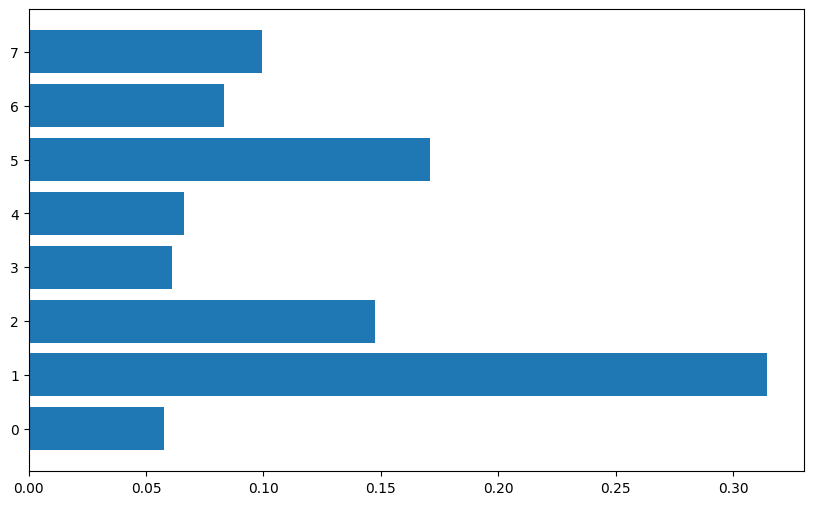

In [130]:
plt.figure(figsize=(10,6))
# subtract 1 from length since we dropped 1 column
plt.barh(range(len(df.columns)-1), model.steps[1][1].feature_importances_)

In [131]:
# now repeat after dropping least important feature
col_drop = df.columns[np.argmin(model.steps[1][1].feature_importances_)]
print(col_drop)

time_pregnant_no


In [132]:
X2 = df.drop(['class', col_drop], axis=1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, stratify=y, random_state=42)

In [134]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X2.columns)
    ])

In [135]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [136]:
y_pred = model.predict(X_test)

In [137]:
param_grid = {'classifier__max_depth':range(1,7)}
mygrid = GridSearchCV(
   model, 
    param_grid = param_grid, 
    cv=5, 
    return_train_score=True
)

In [138]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': range(1, 7)},
             return_train_score=True)

In [139]:
predictions = mygrid.predict(X_train)
print(predictions[:10])

[0 0 0 0 0 0 0 0 1 0]


In [140]:
model.steps[1][1].feature_importances_

array([0.33275264, 0.11630908, 0.02877872, 0.07492399, 0.18190497,
       0.12681771, 0.13851289])

<BarContainer object of 7 artists>

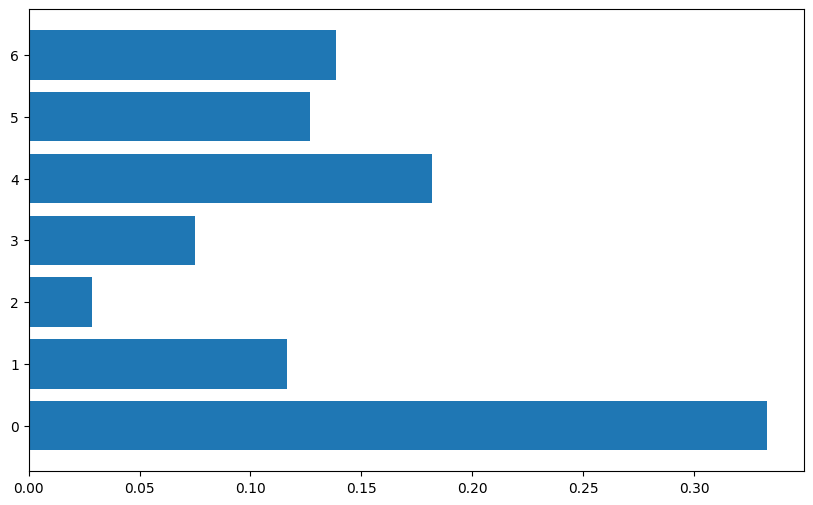

In [141]:
plt.figure(figsize=(10,6))
# subtract 2 from length since we dropped 2 columns
plt.barh(range(len(df.columns)-2), model.steps[1][1].feature_importances_)